In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
datafile=open('Dataset/irisdataset.txt')

In [3]:
data=datafile.read()

In [4]:
data=data.splitlines()

In [5]:
data

['sepal_length,sepal_width,petal_length,petal_width,species',
 '5.1,3.5,1.4,0.2,setosa',
 '4.9,3.0,1.4,0.2,setosa',
 '4.7,3.2,1.3,0.2,setosa',
 '4.6,3.1,1.5,0.2,setosa',
 '5.0,3.6,1.4,0.2,setosa',
 '5.4,3.9,1.7,0.4,setosa',
 '4.6,3.4,1.4,0.3,setosa',
 '5.0,3.4,1.5,0.2,setosa',
 '4.4,2.9,1.4,0.2,setosa',
 '4.9,3.1,1.5,0.1,setosa',
 '5.4,3.7,1.5,0.2,setosa',
 '4.8,3.4,1.6,0.2,setosa',
 '4.8,3.0,1.4,0.1,setosa',
 '4.3,3.0,1.1,0.1,setosa',
 '5.8,4.0,1.2,0.2,setosa',
 '5.7,4.4,1.5,0.4,setosa',
 '5.4,3.9,1.3,0.4,setosa',
 '5.1,3.5,1.4,0.3,setosa',
 '5.7,3.8,1.7,0.3,setosa',
 '5.1,3.8,1.5,0.3,setosa',
 '5.4,3.4,1.7,0.2,setosa',
 '5.1,3.7,1.5,0.4,setosa',
 '4.6,3.6,1.0,0.2,setosa',
 '5.1,3.3,1.7,0.5,setosa',
 '4.8,3.4,1.9,0.2,setosa',
 '5.0,3.0,1.6,0.2,setosa',
 '5.0,3.4,1.6,0.4,setosa',
 '5.2,3.5,1.5,0.2,setosa',
 '5.2,3.4,1.4,0.2,setosa',
 '4.7,3.2,1.6,0.2,setosa',
 '4.8,3.1,1.6,0.2,setosa',
 '5.4,3.4,1.5,0.4,setosa',
 '5.2,4.1,1.5,0.1,setosa',
 '5.5,4.2,1.4,0.2,setosa',
 '4.9,3.1,1.5,0.1,se

In [6]:
datalist=[]
for k in data[1:]:
    datalist.append(k.split(','))

In [7]:
datalist

[['5.1', '3.5', '1.4', '0.2', 'setosa'],
 ['4.9', '3.0', '1.4', '0.2', 'setosa'],
 ['4.7', '3.2', '1.3', '0.2', 'setosa'],
 ['4.6', '3.1', '1.5', '0.2', 'setosa'],
 ['5.0', '3.6', '1.4', '0.2', 'setosa'],
 ['5.4', '3.9', '1.7', '0.4', 'setosa'],
 ['4.6', '3.4', '1.4', '0.3', 'setosa'],
 ['5.0', '3.4', '1.5', '0.2', 'setosa'],
 ['4.4', '2.9', '1.4', '0.2', 'setosa'],
 ['4.9', '3.1', '1.5', '0.1', 'setosa'],
 ['5.4', '3.7', '1.5', '0.2', 'setosa'],
 ['4.8', '3.4', '1.6', '0.2', 'setosa'],
 ['4.8', '3.0', '1.4', '0.1', 'setosa'],
 ['4.3', '3.0', '1.1', '0.1', 'setosa'],
 ['5.8', '4.0', '1.2', '0.2', 'setosa'],
 ['5.7', '4.4', '1.5', '0.4', 'setosa'],
 ['5.4', '3.9', '1.3', '0.4', 'setosa'],
 ['5.1', '3.5', '1.4', '0.3', 'setosa'],
 ['5.7', '3.8', '1.7', '0.3', 'setosa'],
 ['5.1', '3.8', '1.5', '0.3', 'setosa'],
 ['5.4', '3.4', '1.7', '0.2', 'setosa'],
 ['5.1', '3.7', '1.5', '0.4', 'setosa'],
 ['4.6', '3.6', '1.0', '0.2', 'setosa'],
 ['5.1', '3.3', '1.7', '0.5', 'setosa'],
 ['4.8', '3.4', 

In [33]:
x_train=[]
y_train=[]
x_test=[]
y_test=[]
datalist=np.array(datalist)
np.random.shuffle(datalist)
np.random.shuffle(datalist)
np.random.shuffle(datalist)
np.random.shuffle(datalist)
for k in datalist[:int(len(datalist)*.95)]:
    x_train.append(k[1:4])
    y_train.append(k[4:])
    
for k in datalist[int(len(datalist)*.95):]:
    x_test.append(k[1:4])
    y_test.append(k[4:])

In [34]:
x_train=np.array(x_train,dtype=float)
x_test=np.array(x_test,dtype=float)
y_train=np.array(y_train,dtype=str)
y_test=np.array(y_test,dtype=str)
y_train=y_train.reshape(y_train.shape[0])
y_test=y_test.reshape(y_test.shape[0])

In [39]:
def sigmoid(z):
    return(1/(1+math.exp(-1*z)))

def gradient(xi,wi,y):
    z=sigmoid(xi*wi)
    return((y-z)*xi)

#here delta is the derivative of next layer 
def backprop(xi,wi,delta):
    z=sigmoid(xi,wi)
    return(wi*delta*z*(1-z))
labels={'setosa':0,'versicolor':1,'virginica':2}

In [55]:
#input layer 2 neuron ,hidden layer 3 neuron ,op layer 1 neuron

inputfeature=4
layer2size=60
layer3size=1

w12=np.random.rand(inputfeature*layer2size)
w23=np.random.rand(layer2size*layer3size)

rate=0.0010

error=[]

for _ in range(1000):
    
    temperror=0.0
    
    for i in range(x_train.shape[0]):
        # forword propagation

        #layer 1 (input layer)
        oplayer1=[]
        for l in range(inputfeature):
            oplayer1.append(sigmoid(x_train[l][0]))
            #oplayer1.append(sigmoid(x_train[i][0]))
            #oplayer1.append(sigmoid(x_train[i][1]))

        #layer 2(hidden layer)
        oplayer2=[]
        for l in range(layer2size):
            temp=0.0
            for j in range(inputfeature):
                temp=temp+w12[l+j*layer2size]*oplayer1[j]
            oplayer2.append(sigmoid(temp))
            
            #oplayer2.append(sigmoid(w12[0]*oplayer1[0]+w12[0+3]*oplayer1[1]))
            #oplayer2.append(sigmoid(w12[1]*oplayer1[0]+w12[1+3]*oplayer1[1]))
            #oplayer2.append(sigmoid(w12[2]*oplayer1[0]+w12[2+3]*oplayer1[1]))

        #layer 3 (output layer)
        for l in range(layer3size):
            yhat=[]
            temp=0.0
            for j in range(layer2size):
                temp=temp+w23[l+j*layer3size]*oplayer2[j]
            yhat.append(temp)
            
            #yhat=sigmoid(w23[0]*oplayer2[0]+w23[1]*oplayer2[1]+w23[2]*oplayer2[2])
        temperror=temperror+math.pow(labels[y_train[i]]-yhat[0],2)
        #back propagation

        # gradient of last layer
        deltalastlayer=[]
        for l  in range(layer2size):
            deltalastlayer.append(gradient(oplayer2[l],w23[l],labels[y_train[i]]))
            w23[l]=w23[l]-rate*deltalastlayer[l]
            #deltalastlayer.append(gradient(oplayer2[0],w23[0],labels[y_train[i]]))
            #deltalastlayer.append(gradient(oplayer2[1],w23[1],labels[y_train[i]]))
            #deltalastlayer.append(gradient(oplayer2[2],w23[2],labels[y_train[i]]))

            #w23[0]=w23[0]-rate*deltalastlayer[0]
            #w23[1]=w23[1]-rate*deltalastlayer[1]
            #w23[2]=w23[2]-rate*deltalastlayer[2]


        # gradient of second layer (hidden layer) layer
        
        for l in range(layer2size):
            for j in range(inputfeature):
                w12[l+j*layer2size]=w12[l+j*layer2size]-rate*deltalastlayer[l]*oplayer2[l]*(1-oplayer2[l])
        
            #w12[0]=w12[0]-rate*deltalastlayer[0]*oplayer2[0]*(1-oplayer2[0])
            #w12[0+3]=w12[0+3]-rate*deltalastlayer[0]*oplayer2[0]*(1-oplayer2[0])

            #w12[1]=w12[1]-rate*deltalastlayer[1]*oplayer2[1]*(1-oplayer2[1])
            #w12[1+3]=w12[1+3]-rate*deltalastlayer[1]*oplayer2[1]*(1-oplayer2[1])

            #w12[2]=w12[2]-rate*deltalastlayer[2]*oplayer2[2]*(1-oplayer2[2])
            #w12[2+3]=w12[2+3]-rate*deltalastlayer[2]*oplayer2[2]*(1-oplayer2[2])
        
    error.append(temperror/x_train.shape[0])



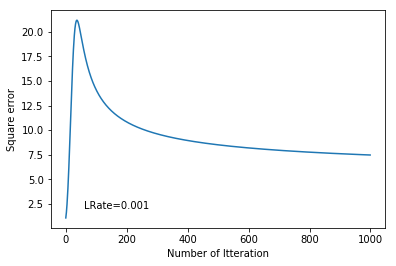

In [50]:
plt.plot(error)
plt.xlabel('Number of Itteration')
plt.ylabel('Square error')
plt.text(60,error[3],('LRate='+str(rate)))
plt.show()

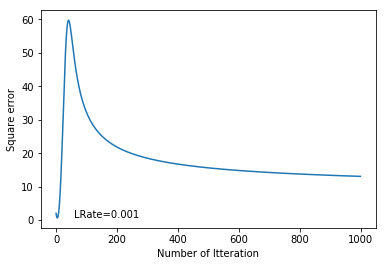

In [54]:
plt.plot(error)
plt.xlabel('Number of Itteration')
plt.ylabel('Square error')
plt.text(60,error[3],('LRate='+str(rate)))
plt.show()

In [ ]:
plt.plot(error)
plt.xlabel('Number of Itteration')
plt.ylabel('Square error')
plt.text(60,error[3],('LRate='+str(rate)))
plt.show()

In [ ]:
for k in range(x_test.shape[0]):
       
    
    
        # forword propagation

        #layer 1 (input layer)
        oplayer1=[]
        oplayer1.append(sigmoid(x_test[k][0]))
        oplayer1.append(sigmoid(x_test[k][1]))

        #layer 2(hidden layer)
        oplayer2=[]
        oplayer2.append(sigmoid(w12[0]*oplayer1[0]+w12[0+3]*oplayer1[1]))
        oplayer2.append(sigmoid(w12[1]*oplayer1[0]+w12[1+3]*oplayer1[1]))
        oplayer2.append(sigmoid(w12[2]*oplayer1[0]+w12[2+3]*oplayer1[1]))

        #layer 3 (output layer)
        yhat=sigmoid(w23[0]*oplayer2[0]+w23[1]*oplayer2[1]+w23[2]*oplayer2[2])
       
        
    
    
        print(yhat,labels[y_test[k]])

